In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(123)

In [ ]:
# Upload xlsx file to data frame

df = pd.read_excel('E Commerce Dataset.xlsx', 'E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1600,51601,0,0.0,Phone,1,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,3,Married,1,0,12.0,1.0,1.0,2.0,148.98
925,50926,0,15.0,Computer,1,15.0,Credit Card,Female,3.0,3,Mobile Phone,1,Single,2,0,13.0,4.0,5.0,8.0,136.73
5360,55361,0,18.0,Mobile Phone,2,8.0,Debit Card,Female,3.0,4,Mobile Phone,1,Married,6,1,19.0,3.0,3.0,3.0,156.95
726,50727,0,29.0,Mobile Phone,1,10.0,Cash on Delivery,Female,3.0,3,Others,5,Married,5,0,NaN,0.0,4.0,2.0,299.43
4777,54778,0,18.0,Mobile Phone,1,11.0,Credit Card,Male,3.0,4,Laptop & Accessory,4,Single,11,0,13.0,2.0,3.0,4.0,184.33


In [ ]:
# prepare variables, which have missing values

cat_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
cont_features = ['HourSpendOnApp']

In [ ]:

# replace missing values by median or most frequent (do not use mean because of outliers are present)

def imputation (df,
                cont_features,
                cat_features,
                cont_strategy = 'median',
                cat_strategy = 'most_frequent'
                ):

# initialize object imputer

  imputerCat = SimpleImputer(missing_values=np.nan, strategy= cat_strategy)
  imputerCont = SimpleImputer(missing_values=np.nan, strategy= cont_strategy)

# fit to data train

  imputerCont.fit(df[cont_features])
  imputerCat.fit(df[cat_features])

# transfrom to data train

  df[cont_features] = imputerCont.transform(df[cont_features])
  df[cat_features] = imputerCat.transform(df[cat_features])
  
  return df

In [ ]:
df = imputation(df,cont_features, cat_features)

In [ ]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
# X, Tenure_array represents the Tenure in months, number of months the customer is with company

Tenure_array = df[['Tenure']].to_numpy()
print(Tenure_array)


[[ 4.]
 [ 1.]
 [ 1.]
 ...
 [ 1.]
 [23.]
 [ 8.]]


In [ ]:
# 1. Linear regression

In [ ]:
# 1.1. Linear regression from E-Commerce dataset

In [ ]:
a = df[['Tenure']]
b = df[['CashbackAmount']]

regr = linear_model.LinearRegression()
regr.fit(a, b)

#predict the Cashback for Tenure 2:
predictedCashback = regr.predict([[2]])
print(predictedCashback)

[[154.67815228]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
b

,CashbackAmount
0,159.93
1,120.90
2,120.28
3,134.07
4,129.60
...,...
5625,150.71
5626,224.91
5627,186.42
5628,178.90


In [ ]:
slope, intercept, r, p, std_err = stats.linregress(a["Tenure"],b["CashbackAmount"])

In [ ]:
c = pd.DataFrame(regr.predict(a), columns = ['Predicted_cashback'])

In [ ]:
Linear = [a["Tenure"], b["CashbackAmount"],c["Predicted_cashback"] ]

In [ ]:
headers = ["Tenure", "CashbackAmount", "Predicted_cashback"]
Linear = pd.concat(Linear, axis=1, keys=headers)

In [ ]:
Linear

,Tenure,CashbackAmount,Predicted_cashback
0,4.0,159.93,160.489459
1,1.0,120.90,151.772499
2,1.0,120.28,151.772499
3,0.0,134.07,148.866845
4,0.0,129.60,148.866845
...,...,...,...
5625,10.0,150.71,177.923380
5626,13.0,224.91,186.640341
5627,1.0,186.42,151.772499
5628,23.0,178.90,215.696876


In [ ]:
Linear2 =Linear.groupby(['Tenure']).mean()

In [ ]:
Linear3 = pd.DataFrame(Linear2, columns=["CashbackAmount", "Predicted_cashback"])

In [ ]:
Linear3

,CashbackAmount,Predicted_cashback
Tenure,,
0.0,142.442579,148.866845
1.0,150.023637,151.772499
2.0,158.012994,154.678152
3.0,168.050821,157.583806
4.0,170.239212,160.489459
5.0,171.282500,163.395113
6.0,168.001913,166.300766
7.0,165.265249,169.206420
8.0,168.699620,172.112073


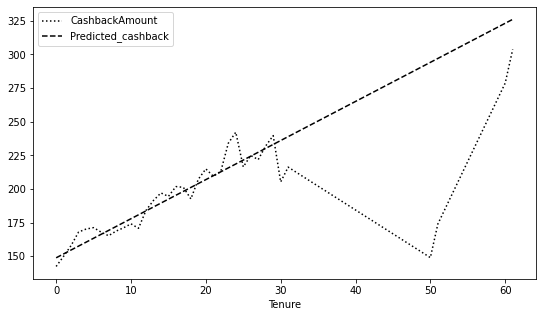

In [ ]:
Linear3.plot(style={'CashbackAmount': ':k', 'Predicted_cashback': '--k'}, figsize=(9, 5))

In [ ]:
# 1.2. Anscombe quartet linear regression

In [ ]:
# There are 4 datasets, each different quality but similar regression line
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
# Revise the dataset shape, statistical metrics are similar
anscombe.shape
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

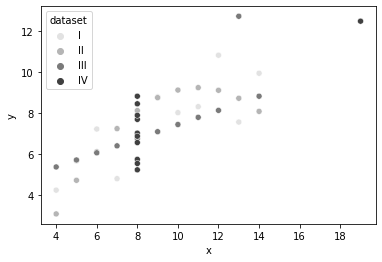

In [ ]:
sns.scatterplot(data=anscombe, x='x', y='y', hue='dataset', palette="Greys")

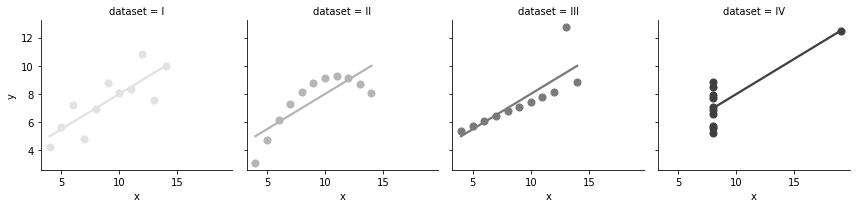

In [ ]:
# Linear regression of each anscombe dataset
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=4, palette="Greys", ci=None,
    height=3, scatter_kws={"s": 50, "alpha": 1}
)

In [ ]:
a1=anscombe[anscombe["dataset"]=="I"]
a2=anscombe[anscombe["dataset"]=="II"]
a3=anscombe[anscombe["dataset"]=="III"]
a4=anscombe[anscombe["dataset"]=="IV"]

In [ ]:
slope1, intercept1, r1, p1, std_err1 = stats.linregress(a1["x"],a1["y"])
slope2, intercept2, r2, p2, std_err2 = stats.linregress(a2["x"],a2["y"])
slope3, intercept3, r3, p3, std_err3 = stats.linregress(a3["x"],a3["y"])
slope4, intercept4, r4, p4, std_err4 = stats.linregress(a4["x"],a4["y"])

In [ ]:
# slope, intercept, r, p and standard error of each curve is almost the same for each different distribution

In [ ]:
slope1, intercept1, r1, p1, std_err1

(0.5000909090909091,
 3.0000909090909103,
 0.8164205163448399,
 0.00216962887307879,
 0.11790550059563408)

In [ ]:
slope2, intercept2, r2, p2, std_err2

(0.5000000000000001,
 3.000909090909089,
 0.816236506000243,
 0.0021788162369107845,
 0.11796374596764074)

In [ ]:
slope3, intercept3, r3, p3, std_err3

(0.4997272727272729,
 3.002454545454544,
 0.8162867394895984,
 0.002176305279228015,
 0.11787766222100221)

In [ ]:
slope4, intercept4, r4, p4, std_err4

(0.4999090909090909,
 3.0017272727272726,
 0.8165214368885028,
 0.002164602347197222,
 0.11781894172968553)

In [ ]:
# 2. Multiple regression ( standard, hierarchical, setwise, stepwise )

In [ ]:
a1 = df[['Tenure', 'HourSpendOnApp','Churn']]
b1 = df['CashbackAmount']

regr = linear_model.LinearRegression()
regr.fit(a1, b1)

#predict the Cashback for 4 HourSpendOnApp and Tenure 2 and Churn flag NO in months:
predictedCashback = regr.predict([[2, 4, 0]])

print(predictedCashback)

[161.95349488]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
c1 = pd.DataFrame(regr.predict(a1), columns = ['Predicted_cashback'])

In [ ]:
b2 = pd.DataFrame(b1, columns = ['CashbackAmount'])

In [ ]:
b2

,CashbackAmount
0,159.93
1,120.90
2,120.28
3,134.07
4,129.60
...,...
5625,150.71
5626,224.91
5627,186.42
5628,178.90


In [ ]:
Multiple = [ a1["Tenure"],b2["CashbackAmount"],c1["Predicted_cashback"] ]

In [ ]:
headers = ["Tenure", "CashbackAmount", "Predicted_cashback"]
Multiple = pd.concat(Multiple, axis=1, keys=headers)

In [ ]:
Multiple2 =Multiple.groupby(['Tenure']).mean()

In [ ]:
Multiple3 = pd.DataFrame(Multiple2, columns=["CashbackAmount", "Predicted_cashback"])

In [ ]:
Multiple3

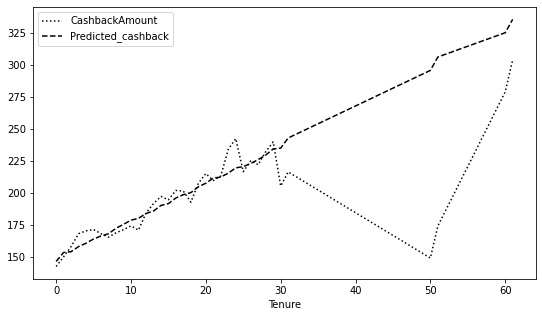

In [ ]:
Multiple3.plot(style={'CashbackAmount': ':k', 'Predicted_cashback': '--k'}, figsize=(9, 5))

In [ ]:
# 3. Polynomial regression

In [ ]:
Polynomial = [ df["Tenure"],df["CashbackAmount"]]

In [ ]:
headers = ["Tenure", "CashbackAmount"]
Polynomial = pd.concat(Polynomial, axis=1, keys=headers)

In [ ]:
Polynomial2 =Polynomial.groupby(['Tenure']).mean().reset_index()

In [ ]:
Polynomial2

In [ ]:
import pandas

In [ ]:
a = Polynomial2[['Tenure']]
b = Polynomial2[['CashbackAmount']]

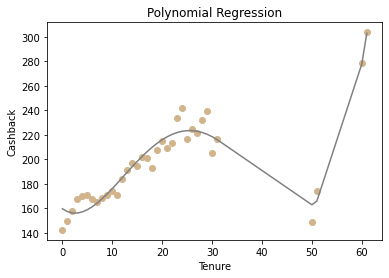

In [ ]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(a, b)
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(a)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, b)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(a, b, color='tan')
    plt.plot(a, pol_reg.predict(poly_reg.fit_transform(a)), color='grey')
    plt.title('Polynomial Regression')
    plt.xlabel('Tenure')
    plt.ylabel('Cashback')
    plt.show()
    return
viz_polymonial()

In [ ]:
poly = pol_reg.predict(poly_reg.fit_transform(a))

In [ ]:
poly1 = pd.DataFrame(poly, columns=["poly"])

In [ ]:
poly1

In [ ]:
# 4. Logaritmic regression

In [ ]:
# count of customer IDs in each Tenure is somewhat suitable for logaritmic curve presentation
# before we remove outliers we can see that the majority of NOT churned /active/ customers is in the first 30 tenures
# logaritmic transformation for linear regression
df1 = pd.DataFrame(df,columns = ['Tenure', 'Churn'])
df2 = df1[df1['Churn']== 0]
df3 =df2.groupby(['Tenure']).count().reset_index()
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


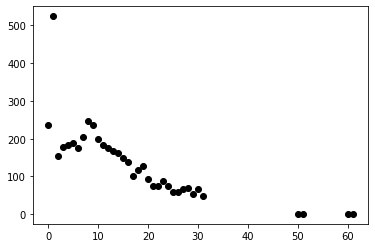

In [ ]:
f1 = df3['Tenure'] # x axis, horizontal coordinates, grouped tenures
f2 = df3['Churn'] # y axis, vertical coordinates, count of NOT Churned Customer IDs

# Convert data frames to array
f1_data = np.array(f1) 
f2_data = np.array(f2)     
  
# Do log
f1log_data = np.log(f1_data.reshape(-1,1)) 
f2log_data = np.log(f2_data.reshape(-1,1))

plt.scatter(f1_data, f2_data, c ="black")
# To show the plot
plt.show()

In [ ]:
from numpy import inf
f1log_data[f1log_data == -inf] = 0
f2log_data[f2log_data == -inf] = 0
f1log_data[f1log_data == inf] = 0
f2log_data[f2log_data == inf] = 0


In [ ]:
y_pred_log= LinearRegression()
y_pred_log.fit(f1log_data,f2log_data)

LinearRegression()

In [ ]:
print("Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

Intercept value of Model is  [7.16627909]
Co-efficient Value of Log Model is :  [[-1.09852851]]


In [ ]:
Log = pd.DataFrame(Linear2, columns=["CashbackAmount"])

In [ ]:
Log['Log2Cashback'] = np.log2(Log['CashbackAmount'])
Log['Log10Cashback'] = np.log10(Log['CashbackAmount'])
Log['LogNatCashback'] = np.log(Log['CashbackAmount'])

In [ ]:
Log

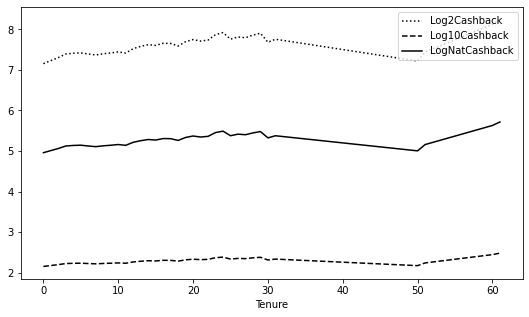

In [ ]:
Log = Log.drop('CashbackAmount', axis=1, errors='ignore')
Log.plot(style={'Log2Cashback': ':k', 'Log10Cashback': '--k', 'LogNatCashback': '-k'}, figsize=(9, 5))

In [ ]:
# 5. Exponential regression

In [ ]:
Exp = pd.DataFrame(Linear2, columns=["CashbackAmount"])

In [ ]:
y = Exp[['CashbackAmount']]

In [ ]:
x =Exp.groupby(['Tenure']).mean().reset_index()

In [ ]:
x = x['Tenure']

In [ ]:
x

In [ ]:
# Fit the unweighted polynomial degree 1 linear  to the data, other possibilities would be to plot curve fit or weighted polynomial degree
fitu = np.polyfit(x, np.log(y), 1)

# View the output of the model
print(fitu)

# Convert the polynomial back into an exponential
a = np.exp(fitu[1])
b = fitu[0]
x_fitted_polyfit = np.linspace(np.min(x), np.max(x), 100)
y_fitted_polyfit = a * np.exp(b * x_fitted_polyfit)

[[0.00720922]
 [5.12912   ]]


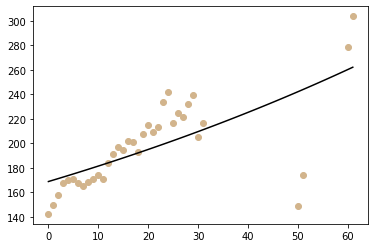

In [ ]:
# Plot Unweighted exponential curve
ax = plt.axes()
ax.scatter(x, y, label='Raw data', color='tan')
ax.plot(x_fitted_polyfit, y_fitted_polyfit, 'k')

In [ ]:
exp = pd.DataFrame(y_fitted_polyfit, columns=["ExpCashback"])

In [ ]:
exp

In [ ]:
# 6. Quantile regression

In [169]:
data = pd.DataFrame(data = np.hstack([x, y]), columns = ["x", "y"]) 
 
import statsmodels.formula.api as smf   
mod = smf.quantreg('y ~ x', data) 
res = mod.fit(q=.5) 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4926
Model:                       QuantReg   Bandwidth:                       14.64
Method:                 Least Squares   Sparsity:                        30.65
Date:                Mon, 26 Sep 2022   No. Observations:                   36
Time:                        10:35:30   Df Residuals:                       34
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.8460      4.182     37.505      0.000     148.347     165.345
x              2.4083      0.166     14.504      0.000       2.071       2.746


In [181]:
## Build the model for other quantiles, bins by 0.1
quantiles = np.arange(0.1,1,0.1) 
print(quantiles)  
models = [] 
params = []  

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [182]:
for qt in quantiles:  
  print(qt)  
  res = mod.fit(q = qt )    
  models.append(res)    
  params.append([qt, res.params['Intercept'], res.params['x']] )

params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef'])  
print(params)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
    qt   intercept    x_coef
0  0.1  157.360463  0.326266
1  0.2  154.637903  1.687546
2  0.3  153.198057  2.092532
3  0.4  155.685145  2.052795
4  0.5  156.846032  2.408262
5  0.6  160.870028  2.342295
6  0.7  160.702558  2.384167
7  0.8  160.373250  2.559190
8  0.9  159.783712  2.755703


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


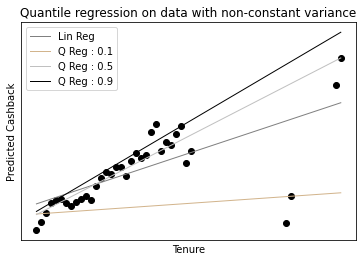

In [203]:
plt.figure(5) 
plt.scatter(x, y,  color='black') 
model2 = LinearRegression(fit_intercept = True, normalize = False) 
model2.fit(x, y)  
y_pred2 = model2.predict(x) 
plt.plot(x, y_pred2, color='grey',linewidth=1, label='Lin Reg')  
y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x 
plt.plot(x, y_pred3, color='tan',linewidth=1, label='Q Reg : 0.1')  
y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x 
plt.plot(x, y_pred4, color='silver',linewidth=1, label='Q Reg : 0.5')   
y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x 
plt.plot(x, y_pred5, color='black', linewidth=1, label='Q Reg : 0.9')   
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("Tenure") 
plt.ylabel("Predicted Cashback") 
plt.title("Quantile regression on data with non-constant variance") 
plt.legend()

In [186]:
QuantileCashback=y_pred4

In [187]:
QuantileCashback = QuantileCashback.rename(columns={'Tenure': 'QuantileCashback'})

In [ ]:
QuantileCashback

In [ ]:
# 7. Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
# define x and y
Lassodf = pd.DataFrame(Linear2, columns=["CashbackAmount"])
y = Lassodf[['CashbackAmount']]
x = Lassodf.groupby(['Tenure']).mean().reset_index()
y = y.reset_index()
x = x.drop(['CashbackAmount'], axis=1, errors='ignore')
y = y.drop(['Tenure'], axis=1, errors='ignore')

# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(x, y)
# make a prediction
LassoCashback = model.predict(x)
# summarize prediction
print(LassoCashback)

[166.95020437 168.50146336 170.05272235 171.60398135 173.15524034
 174.70649933 176.25775832 177.80901732 179.36027631 180.9115353
 182.4627943  184.01405329 185.56531228 187.11657127 188.66783027
 190.21908926 191.77034825 193.32160724 194.87286624 196.42412523
 197.97538422 199.52664321 201.07790221 202.6291612  204.18042019
 205.73167918 207.28293818 208.83419717 210.38545616 211.93671515
 213.48797415 215.03923314 244.513154   246.06441299 260.02574392
 261.57700292]


In [ ]:
# Format for final data frame
LassoCashback = pd.DataFrame(LassoCashback, columns=["LassoCashback"])

In [ ]:
# 8. Ridge regression

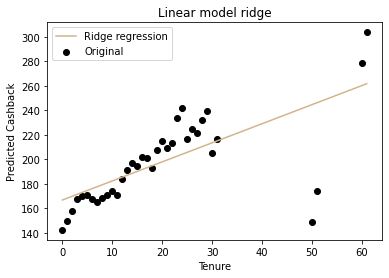

In [ ]:
# define x and y
Ridgedf = pd.DataFrame(Linear2, columns=["CashbackAmount"])
y = Ridgedf[['CashbackAmount']]
x =Ridgedf.groupby(['Tenure']).mean().reset_index()
y = y.reset_index()
x = x.drop(['CashbackAmount'], axis=1, errors='ignore')
y = y.drop(['Tenure'], axis=1, errors='ignore')

from sklearn.linear_model import Ridge
ridge = Ridge().fit(x, y)
plt.scatter(x,y,color="black",label="Original")
plt.plot(x, ridge.predict(x), label="Ridge regression",color="tan")
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Predicted Cashback")
_ = plt.title("Linear model ridge")

In [ ]:
RidgeCashback=ridge.predict(x)

In [ ]:
RidgeCashback = pd.DataFrame(RidgeCashback, columns=["RidgeCashback"])

In [ ]:
RidgeCashback

In [ ]:
# 9. Bayesian regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

In [ ]:
# Creating and training model
model = BayesianRidge()
model.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
# Model making a prediction on test data
y_prediction = model.predict(x)

In [ ]:
# Evaluation of r2 (Bayesian Ridge Regressor) score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y, y_prediction)}")

r2 Score Of Test Set : 0.4666199339828567


In [ ]:
y_prediction

array([167.87709426, 169.38187967, 170.88666507, 172.39145048,
       173.89623588, 175.40102128, 176.90580669, 178.41059209,
       179.9153775 , 181.4201629 , 182.92494831, 184.42973371,
       185.93451912, 187.43930452, 188.94408993, 190.44887533,
       191.95366074, 193.45844614, 194.96323155, 196.46801695,
       197.97280235, 199.47758776, 200.98237316, 202.48715857,
       203.99194397, 205.49672938, 207.00151478, 208.50630019,
       210.01108559, 211.515871  , 213.0206564 , 214.52544181,
       243.1163645 , 244.6211499 , 258.16421854, 259.66900395])

In [ ]:
BayesCashback = pd.DataFrame(y_prediction, columns=["BayesCashback"])

In [ ]:
BayesCashback

In [ ]:
# FINAL DATA FRAME

In [189]:
# create data frame which will contain all cashback trendlines
comparison=pd.concat([Linear3, Multiple3['Predicted_cashback'],poly1,exp,RidgeCashback, BayesCashback, LassoCashback, QuantileCashback], axis=1, join="inner")

In [190]:
# prepare column names
symbols = ['OriginalCashback', 'LinearCashback', 'MultipleCashback','PolynomialCashback','ExpCashback','RidgeCashback','BayesCashback','LassoCashback' ,'QuantileCashback' ]

comparison.columns = symbols

In [191]:
# Print data frame and see the grouped Cashback by Tenure 
# Cashback trendlines are: original values, linear regression, multiple regression, polynomial regression, Cashback logarithmus, 
# Polynomial regression is providing from this choice the best trendline 
comparison

,OriginalCashback,LinearCashback,MultipleCashback,PolynomialCashback,ExpCashback,RidgeCashback,BayesCashback,LassoCashback,QuantileCashback
0.0,142.442579,148.866845,146.338823,159.715749,168.868448,166.869553,167.877094,166.950204,156.846032
1.0,150.023637,151.772499,153.370201,157.364188,169.620238,168.424856,169.381880,168.501463,159.254294
2.0,158.012994,154.678152,153.956857,156.247814,170.375375,169.980158,170.886665,170.052722,161.662556
3.0,168.050821,157.583806,157.985076,156.226401,171.133873,171.535461,172.391450,171.603981,164.070818
4.0,170.239212,160.489459,160.594955,157.165612,171.895748,173.090764,173.896236,173.155240,166.479079
5.0,171.282500,163.395113,163.884102,158.936996,172.661016,174.646067,175.401021,174.706499,168.887341
6.0,168.001913,166.300766,166.241630,161.417993,173.429690,176.201370,176.905807,176.257758,171.295603
7.0,165.265249,169.206420,167.982800,164.491931,174.201786,177.756672,178.410592,177.809017,173.703865
8.0,168.699620,172.112073,172.249206,168.048027,174.977319,179.311975,179.915377,179.360276,176.112126
9.0,171.155061,175.017727,175.337370,171.981385,175.756305,180.867278,181.420163,180.911535,178.520388


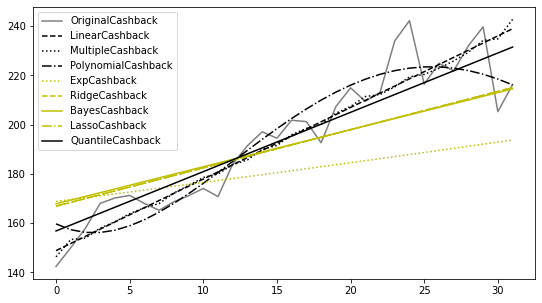

In [202]:
# The polynomial trendline is providing nice fit for the first 30 months /Tenures/
comparison.plot(style={'OriginalCashback': '#7f7f7f', 'LinearCashback': '--k','MultipleCashback': ':k','PolynomialCashback': '-.k','ExpCashback': ':y','RidgeCashback': '--y','BayesCashback': '-y','LassoCashback': '-.y','QuantileCashback': '-k' }, figsize=(9, 5))